# Triple Pendulum on a Cart: Derivation of Equations of Motion and Simulation

Originally created by Bolorkhuu Dariimaa (ca. 2017), edited by Carsten Knoll,  2021-02-02


Primary target audience of this notebook are students which are supervised by the Institute of Control Theory.

This notebook requires the python packages `ipydex` and `symbtools`. To install these, one might use:

```

!pip install ipydex symbtools

```

---

<br><br><br>
### <span style="color: red;">Important: Be careful where absolute and relative angles are used.</span>


<br><br>


In [1]:
%load_ext ipydex.displaytools

from sympy import sin, cos, Function
import numpy as npy
np = npy
import sympy as sp
import sys
import pickle
import numpy as np
import symbtools as st
from symbtools import modeltools as mt
import pickle
np.set_printoptions(precision=3, suppress=True)

from matplotlib import pyplot as plt
import time
time.ctime()

'Tue Feb  2 17:40:51 2021'

In [2]:
from sympy.interactive import printing
printing.init_printing()

Image:

<img src="images/model_triple.png">

In [3]:
t = sp.Symbol('t')
params = sp.symbols('m0, m1, m2, m3, J1, J2, J3, l1, l2, l3, a1, a2, a3, g, d1, d2, d3')

st.make_global(params)

params_values = [(m0, 3.34), (m1, 0.8512), (m2, 0.8973), (m3, 0.5519), 
                 (J1, 0.01980194), (J2, 0.02105375), (J3, 0.01818537), 
                 (l1, 0.32), (l2, 0.419), (l3, 0.485), 
                 (a1, 0.20001517), (a2, 0.26890449), (a3, 0.21666087), (g, 9.81),
                 (d1, 0.00715294), (d2, 1.9497e-06), (d3, 0.00164642)]




F = sp.Symbol('F')

Np = 3 # number of passive coordinates
Nq = 1 # number of actuated coordinates
n = Np + Nq
pp = st.symb_vector("p1:{0}".format(Np+1))
qq = st.symb_vector("q1:{0}".format(Nq+1))


aa = st.symb_vector("a1:{0}".format(Nq+1))

ttheta = st.row_stack(pp, qq) ##:T
tthetad = st.time_deriv(ttheta, ttheta) ##:T
tthetadd = st.time_deriv(ttheta, ttheta, order=2) ##:T
st.make_global(ttheta, tthetad)


---

---

---

Meaning of the variables: absolut values!

$[p_1, p_2, p_3, q_1] = [\varphi_1, \varphi_2, \varphi_3, x_0]$

---

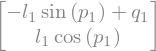

---

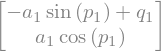

---

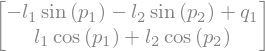

---

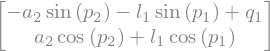

---

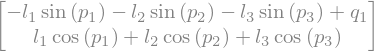

---

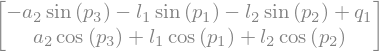

---

In [4]:
ex = sp.Matrix([1, 0])
ey = sp.Matrix([0, 1])

Rz = mt.Rz

S0 = G0 = ex*q1 ##:

G1 = G0 + Rz(p1)*ey*l1 ##:
S1 = G0 + Rz(p1)*ey*a1 ##:

G2 = G1 + Rz(p2)*ey*l2 ##:
S2 = G1 + Rz(p2)*ey*a2 ##:

G3 = G2 + Rz(p3)*ey*l3 ##:
S3 = G2 + Rz(p3)*ey*a2 ##:


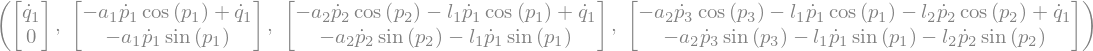

---

In [5]:
# Zeitableitungen der Schwerpunktskoordinaten
S0dt, S1dt, S2dt, S3dt = st.col_split(st.time_deriv(st.col_stack(S0, S1, S2, S3), ttheta)) ##:

In [6]:
# Kinetische Energie vom Schlitten
T0 = 0.5 * m0 * qdot1**2
# Kinetische Energie vom Pendel1
T1 = 0.5 * m1 * (S1dt.T * S1dt)[0] + 0.5 * J1 * pdot1**2
# Kinetische Energie vom Pendel2
T2 = 0.5 * m2 * (S2dt.T * S2dt)[0] + 0.5 * J2 * pdot2**2
# Kinetische Energie vom Pendel3
T3 = 0.5 * m3 * (S3dt.T * S3dt)[0] + 0.5 * J3 * pdot3**2

# Gesamt Kinetische Energie
T = T0 + T1 + T2 + T3

# Gesamt Potentielle Energie
V = g * (m1 * S1[1] + m2 * S2[1] + m3 * S3[1])

# Geschwindigkeitsabhängige (viskose) Reibungen
R = 0.5 * d1 * pdot1**2 + 0.5 * d2 * (pdot2 - pdot1)**2 + 0.5 * d3 * (pdot3 - pdot2)**2

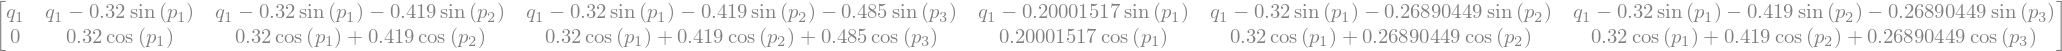

---

In [7]:
key_point_pos_expr = st.col_stack(G0, G1, G2, G3, S1, S2, S3).subs(params_values) ##:
key_point_pos_func = st.expr_to_func(ttheta, key_point_pos_expr, keep_shape=True)

### Visualization of kinematics (optional, just for didactic or debug purpose)

In [8]:
%matplotlib inline

def plot_func(p1, p2, p3, q1, lines=None, init=False):
    
    res_arr = key_point_pos_func(p1, p2, p3, q1)
    
    # joints
    xxg, yyg = res_arr[:, :4]
    
    # centers of mass
    xxs, yys = res_arr[:, 4:]
    
    
    # G0, G1, G2, S0, S1, S2 = res_arr.T    
    
    if lines is None:
        fig = plt.figure(figsize=(16, 6))
        ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.3,2.3), ylim=(-1.3,1.3))
        ax.set_aspect('equal')
        

        line1, = ax.plot(xxg, yyg,"b-o")
        line2, = ax.plot(xxs, yys,"r.")
        
        if init:
            return fig, ax, line1, line2

    else:
        line1, line2 = lines
        line1.set_data(xxg, yyg)
        line2.set_data(xxs, yys)
        
        return line1, line2

from ipywidgets import interact
@interact(p1=(-4, 4, .1), p2=(-4, 4, .1), p3=(-4, 4, .1), q1=(-2, 2, .1))
def i_plot(p1, p2, p3, q1):
    plot_func(p1, p2, p3, q1)
    
    

interactive(children=(FloatSlider(value=0.0, description='p1', max=4.0, min=-4.0), FloatSlider(value=0.0, desc…

In [9]:
external_forces = [0, 0, 0, F] ##:

---

In [10]:


if 0:
    # Calculate the model based on lagrange equation (about 30s)
    %time mod = mt.generate_symbolic_model(T, V, ttheta, external_forces)
    
    # perform patial linearization such that system input is acceleration and not force (about 9min)
    %time mod.calc_coll_part_lin_state_eq()
    
    # write the model to disk to save time in the next run of the notebook
    with open("model_triple_pendulum_knoll.pcl", "wb") as pfile:
        pickle.dump(mod, pfile)
else:
    with open("model_triple_pendulum_knoll.pcl", "rb") as pfile:
        mod = pickle.load(pfile)

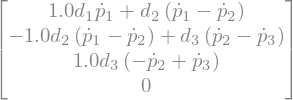

---

In [11]:
st.gradient(R, tthetad).smplf.T ##:

In [12]:
rhs = mod.ff + mod.gg*mod.aa ##:S

---

In [13]:
# count ops -> how big is the expression?
rhs[4].co

In [14]:
# generate LaTeX-Code for the video:
from symbtools import interactive_aux as ia
ia.adapted_latex(rhs)

\left(\begin{matrix}
\dot{p}_{1}\\
\dot{p}_{2}\\
\dot{p}_{3}\\
\dot{q}_{1}\\
\frac{1.0 \ddot{q}_{1} \left(- a_{2}^{2} l_{1} m_{3}^{2} \left(l_{2} \left(a_{2} m_{2} + l_{2} m_{3}\right) \cos{\left(p_{1} - p_{2} \right)} \cos{\left(p_{2} - p_{3} \right)} - \left(J_{2} + a_{2}^{2} m_{2} + l_{2}^{2} m_{3}\right) \cos{\left(p_{1} - p_{3} \right)}\right) \cos{\left(p_{3} \right)} - l_{1} \left(a_{2} m_{2} + l_{2} m_{3}\right) \left(a_{2}^{2} l_{2} m_{3}^{2} \cos{\left(p_{1} - p_{3} \right)} \cos{\left(p_{2} - p_{3} \right)} - \left(J_{3} + a_{2}^{2} m_{3}\right) \left(a_{2} m_{2} + l_{2} m_{3}\right) \cos{\left(p_{1} - p_{2} \right)}\right) \cos{\left(p_{2} \right)} + \left(a_{2}^{2} l_{2}^{2} m_{3}^{2} \cos^{2}{\left(p_{2} - p_{3} \right)} - \left(J_{3} + a_{2}^{2} m_{3}\right) \left(J_{2} + a_{2}^{2} m_{2} + l_{2}^{2} m_{3}\right)\right) \left(a_{1} m_{1} + l_{1} m_{2} + l_{1} m_{3}\right) \cos{\left(p_{1} \right)}\right)}{- 2.0 a_{2}^{2} l_{1}^{2} l_{2} m_{3}^{2} \left(a_{2} m_{2} + l_{2}

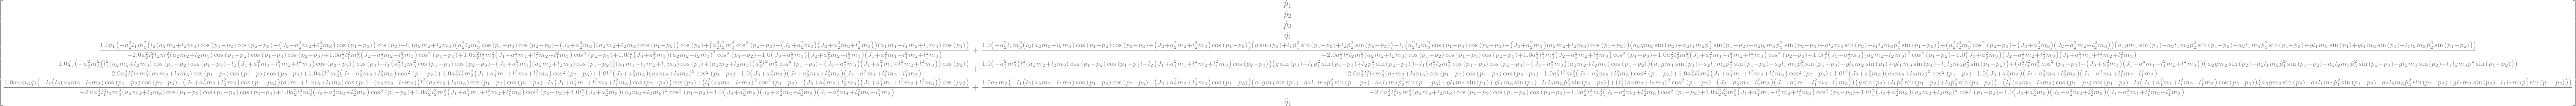

In [15]:
rhs

In [16]:
rhs_v = rhs.subs(params_values) ##:S

---

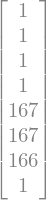

In [17]:
# count_ops for each component (after substitution of numerical values)
rhs_v.co

In [18]:
# which symbols are still occurring?
rhs_v.s

### Design of the Tranquilisation Controller

$\dot E = L_f E + L_g E \cdot a$

Due to conservation of energy and dissipation we have $L_f E \leq 0$. Through suitable choice of input signal $a$ the second term should also be made negative.

Example: $a = \mathtt{clip}\big(L_g E \cdot a_{max}, - a_{max}, a_{max}\big)$.

Problem: Compliance with the position constraints: $x_0 = q_1 \stackrel{!}{\in}[x_{\mathrm{min}}, x_{\mathrm{max}}]$. This is achieved by adding an additional artificial potential term with a bath-tub-like shape as a penalty function for $q_1$-position.


In [19]:
def penalty_expression(x, xmin, xmax, m=5, scale=1):
    """
    return a quadratic parabola (vertex in the middle between xmin and xmax)
    multiplied by a smooth switching function sucht that the resulting curve
    is almost zero between xmin and xmax (exponentially faded) and almost identical
    to the parabola outside that interval

    :param x:
    :param xmin:
    :param xmax:
    :param m:       slope at the (smooth) saltus
    :param scale:   scaling factor of result
    :return:
    """

    if not isinstance(x, (sp.Symbol, float, int, np.number)):
        msg = "unexpected type for variable in penalty expression: %s" % type(x)
        raise TypeError(msg)

    if xmin == xmax:
        print("penalty expression: xmin == xmax == %s" % xmin)

    xmid = xmin + (xmax - xmin)/2
    # first term: parabola -> 0,                            second term: 0 -> parabola
    res = (x-xmid)**2/(1 + sp.exp(m*(x - xmin))) + (x-xmid)**2/(1 + sp.exp(m*(xmax - x)))
    res *= scale
    # sp.plot(res, (x, xmin-xmid, xmax+xmid))
    return res

In [20]:
# total energy:

Eges = T + V

In [21]:
Edot = st.lie_deriv(Eges, mod.ff, mod.xx)

Edot_conservative = Edot.subz0([d1, d2, d3])

In [22]:
Edot_conservative.s

---

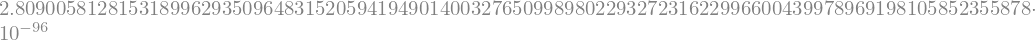

In [23]:
# plausibility check: Edot should be zero if qdot1 = 0.

Edot_test = Edot.subs(qdot1, 0)

# However the expresion is too large to be simplified in reasonable time
Edot_test.co ##:

# evaluate with `subs_random_numbers` and check that the expression is "zero up to numerical noise"
Edot_test.srn

---

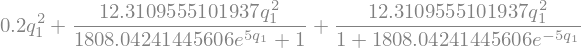

---

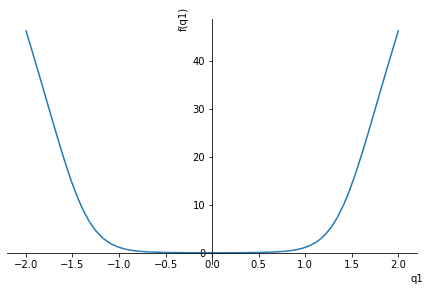

In [24]:

En = Eges.subs(params_values)

# Energy in upper equilibrium (used as scale for the penalty function)
Eooo = En.subz0(mod.xx) ##:

E_pen = penalty_expression(q1, -1.5, 1.5, m=5, scale=Eooo) + 0.2*q1**2 ##:
sp.plot(E_pen, (q1, -2, 2))

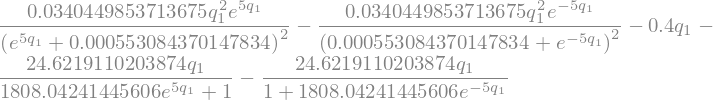

---

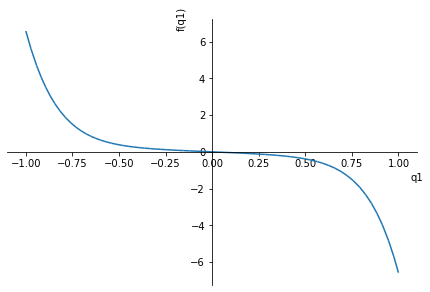

In [25]:
# Force driving the cart back to the center if it comes too close to the border
F_pen = -E_pen.diff(q1) ##:

sp.plot(F_pen, (q1, -1, 1))


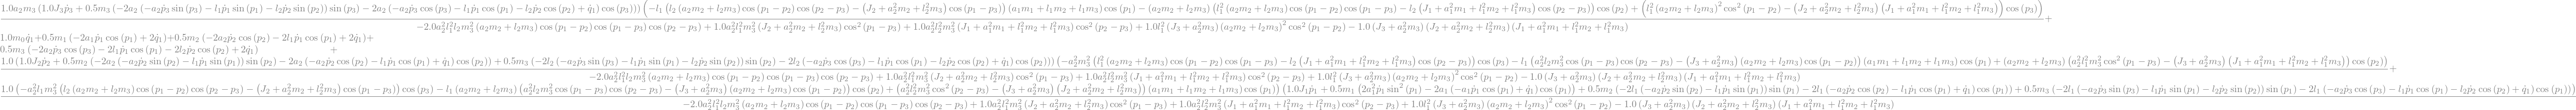

In [26]:
LgE = st.lie_deriv(Eges, mod.gg, mod.xx)

LgE 

## Create Simulation Model
without any actuation (i.e. no tranqulisation controller is active)

In [27]:
simmod = st.SimulationModel(mod.ff, mod.gg, mod.xx, model_parameters=params_values)

In [28]:
rhs = simmod.create_simfunction()


In [29]:
xx0 = np.array([2, 2, 2, 0,  0, 0, 0, 0])

In [30]:
from scipy.integrate import odeint

In [31]:
# simulate 5 seconds
tt = np.linspace(0, 15, 1000)
res = odeint(rhs, xx0, tt)  ##:S

---

In [32]:
Eges_subs = Eges.subs(params_values)
Eges_func = st.expr_to_func(mod.xx, Eges_subs)

In [33]:
Eges_subs.s ##:
mod.xx ##:T

---

---

In [34]:
# system energy at upper equilibrium
Eges_func(0, 0, 0, 0,  0, 0, 0, 0)

array(12.311)

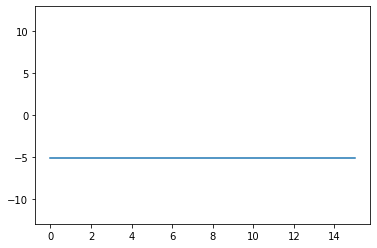

In [35]:
# check energy conservation

EE = Eges_func(*res[:, :].T)

plt.plot(tt, EE)
plt.ylim(-13, 13)


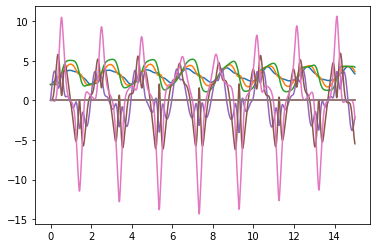

In [36]:
# plot state components 

plt.plot(tt, res)